# Mobility in the Allegheny County during COVID-19
----

**Tomek Loboda, May 11, 2020**

This notebook analyzes the Allegheny County mobility data procured and prepared by Kostas.  Mobility is based on mobile phone location tracking and is aggregated at the level of census block.  We want to use this information to differentiate subgroups of the synthetic population of the county in an ensemble of PRAM simulations.

## Initialize Enviroment
----

In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('classic')
sns.set_style('whitegrid')

## Load Data
----

In [3]:
fpath_mobility = os.path.join('..', 'src', 'ext', 'mobility', 'allegheny-county-mobility.csv')
fpath_dev_cnt  = os.path.join('..', 'src', 'ext', 'mobility', 'allegheny-county-dev-cnt.csv')

if not os.path.isfile(fpath_mobility) or not os.path.isfile(fpath_dev_cnt):
    print(f'Mobility files do not exist')

### Numpy Array

We use ``numpy`` arrays for analyses.

In [4]:
# dm = data mobility

with open(fpath_mobility, 'r') as f:
    dm = np.genfromtxt((','.join(ln.split(',')[1:]) for ln in f), delimiter=',', skip_header=1)  # skip the 1st column (census-block-geoid)
dm = dm[~np.isnan(dm).any(axis=1)]
dm = np.abs(np.add(np.multiply(dm, 0.01), -1.00))  # turn into probability (e.g., 80 --> 0.8); then turn lack of mobility (e.g., 0.8) into mobility (0.2)

In [5]:
dm[0]  # the 1st time series

array([0.27, 0.32, 0.24, 0.09, 0.05, 0.17, 0.31, 0.34, 0.24, 0.32, 0.22,
       0.14, 0.25, 0.3 , 0.36, 0.23, 0.24, 0.04, 0.08, 0.18, 0.23, 0.31,
       0.24, 0.36, 0.13, 0.04, 0.06, 0.33, 0.34, 0.19, 0.34, 0.26, 0.19,
       0.38, 0.58, 0.89, 0.58, 0.26, 1.  , 1.  , 0.42, 0.4 , 0.89, 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.79, 1.  , 1.  , 1.  , 0.28, 0.51,
       1.  , 0.2 , 0.81, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.34, 0.96, 1.  , 1.  , 1.  , 0.81, 0.08,
       0.84, 0.84, 1.  , 0.76, 0.69, 0.42, 0.22, 0.86, 0.18, 0.77, 0.  ,
       0.21, 1.  , 0.37, 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ])

### Pandas DataFrame

We use ``pandas`` dataframes for visalization and for inserting the data into the synthethic population database.  The first column, which hold the census block geo-id, is the index.

In [6]:
dm_df = pd.read_csv(fpath_mobility, parse_dates=True, index_col=0)
dm_df.dropna(axis=0, inplace=True)
dm_df = dm_df.transform(lambda x: abs(x / 100 - 1.00))  # turn into probability (e.g., 80 --> 0.8); then turn lack of mobility (e.g., 0.8) into mobility (0.2)
dm_df.head(4)

,2020-01-01T00:00:00-05:00,2020-01-02T00:00:00-05:00,2020-01-03T00:00:00-05:00,2020-01-04T00:00:00-05:00,2020-01-05T00:00:00-05:00,2020-01-06T00:00:00-05:00,2020-01-07T00:00:00-05:00,2020-01-08T00:00:00-05:00,2020-01-09T00:00:00-05:00,2020-01-10T00:00:00-05:00,...,2020-04-20T00:00:00-04:00,2020-04-21T00:00:00-04:00,2020-04-22T00:00:00-04:00,2020-04-23T00:00:00-04:00,2020-04-24T00:00:00-04:00,2020-04-25T00:00:00-04:00,2020-04-26T00:00:00-04:00,2020-04-27T00:00:00-04:00,2020-04-28T00:00:00-04:00,2020-04-29T00:00:00-04:00
420031106001,0.27,0.32,0.24,0.09,0.05,0.17,0.31,0.34,0.24,0.32,...,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.01,0.00,0.00
420034772002,0.01,0.07,0.05,0.06,0.06,0.33,0.24,0.23,0.27,0.21,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.01,0.00,0.01
420034928002,0.00,0.04,0.09,0.00,0.02,0.07,0.02,0.08,0.07,0.11,...,0.0,0.02,0.0,0.01,0.01,0.0,0.0,0.00,0.07,0.00
420034035004,0.00,0.08,0.03,0.02,0.00,0.08,0.07,0.06,0.13,0.08,...,0.0,0.00,0.0,0.03,0.05,0.0,0.0,0.00,0.04,0.00


Accessing a time series of a specific census block:

In [7]:
dm_df.loc[420031106001]

2020-01-01T00:00:00-05:00    0.27
2020-01-02T00:00:00-05:00    0.32
2020-01-03T00:00:00-05:00    0.24
2020-01-04T00:00:00-05:00    0.09
2020-01-05T00:00:00-05:00    0.05
                             ... 
2020-04-25T00:00:00-04:00    0.00
2020-04-26T00:00:00-04:00    0.00
2020-04-27T00:00:00-04:00    0.01
2020-04-28T00:00:00-04:00    0.00
2020-04-29T00:00:00-04:00    0.00
Name: 420031106001, Length: 120, dtype: float64

Convert to long format:

In [8]:
# dm_df = pd.read_csv(fpath_mobility, parse_dates=True)  # index_col=0
# dm_df.dropna(axis=0, inplace=True)
# dm_df = dm_df.transform(lambda x: abs(x / 100 - 1.00))  # turn into probability (e.g., 80 --> 0.8); then turn lack of mobility (e.g., 0.8) into mobility (0.2)

# dm_df = pd.melt(dm_df, id_vars=['census_block_geoid'], var_name='t', value_name='mobility')
# # dm_df = pd.melt(dm_df, var_name='t', value_name='mobility')
# dm_df.head(1090)

## Visualize Data for Insight
----

### Individual Mobility Time Series

First, let's plot several individual time series.

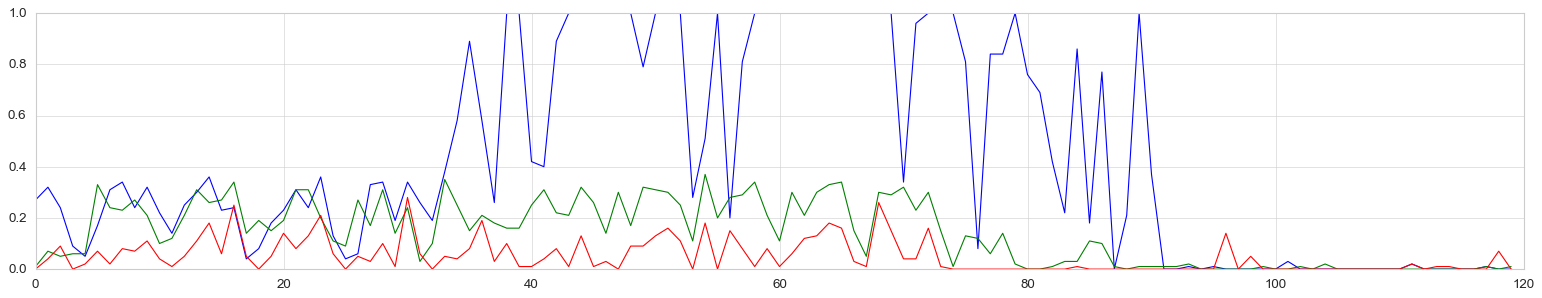

In [9]:
t = np.arange(len(dm[0]))

fig = plt.figure(figsize=(24,4))
plt.plot(t, dm[0])
plt.plot(t, dm[1])
plt.plot(t, dm[2])

No clue why the blue line goes over 1.  No mobility is larger than that as evidenced by:

In [10]:
print(np.max(dm))
print(np.max(dm[0]))

1.0
1.0


In [11]:
# sns.lineplot(x=t, y=dm[1])

### Aggregate Mobility Time Series

Time to look at aggregated time series.

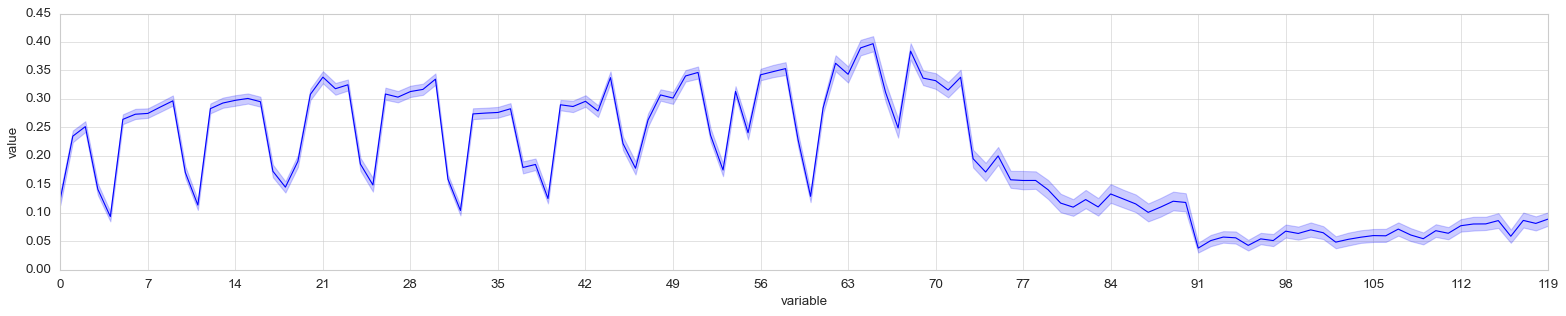

In [12]:
fig = plt.figure(figsize=(24,4))
plt.xticks(np.arange(0, len(t), 7))
sns.lineplot(x="variable", y="value", data=pd.DataFrame(dm).melt())

The mobility data start on Jan 1, 2020, which was a Wednesday.  The cyclical drops in mobility are weekends when people stay home (it's cold outside) more so than on weekdays when they need to work.  According to [this source](https://www.governor.pa.gov/newsroom/gov-wolf-sec-of-health-pennsylvania-on-statewide-stay-at-home-order-beginning-at-8-pm-tonight-most-prudent-option-to-stop-the-spread/), the stay-at-home-order for Pennsylvania has been effective as of April 1, 2020, or on the 90th day of the year (31 + 28 + 31 = 90).  There is a visible change in mobility pattern on that day, but mobility starts to drop already about two weeks prior to that day.  Days 0-90 (we use 0-indexing) are good for establishing what a normal mobility looks like in winter months.  All changes in mobility should be assessed for days over 90.  Therefore, we split all mobility time series in the dataset into ``pre`` and ``post`` leaving out roughly 20 days between the two for the change in mobility pattern to stabilize.

The number of time series and the length of them in the entire dataset:

In [13]:
print(len(dm))
print(len(dm[0]))

1087
120


The ``pre`` dataset:

In [14]:
t_pre = np.arange(0,70,1)
dm_pre = np.take(dm, t_pre, axis=1)

t_pre_idx = t_pre  # indices used for plotting; they coninside with t_pre, but we define this variable here for consistency with the post dataset

print(len(dm_pre))
print(len(dm_pre[0]))

1087
70


The ``post`` dataset:

In [15]:
t_post = np.arange(91, len(dm[0]), 1)
dm_post = np.take(dm, t_post, axis=1)

t_post_idx = t_post - t_post[0]  # indices used for plotting

print(len(dm_post))
print(len(dm_post[0]))

1087
29


As a sanity check, let's look at the very first time series:

In [16]:
dm[0]

array([0.27, 0.32, 0.24, 0.09, 0.05, 0.17, 0.31, 0.34, 0.24, 0.32, 0.22,
       0.14, 0.25, 0.3 , 0.36, 0.23, 0.24, 0.04, 0.08, 0.18, 0.23, 0.31,
       0.24, 0.36, 0.13, 0.04, 0.06, 0.33, 0.34, 0.19, 0.34, 0.26, 0.19,
       0.38, 0.58, 0.89, 0.58, 0.26, 1.  , 1.  , 0.42, 0.4 , 0.89, 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.79, 1.  , 1.  , 1.  , 0.28, 0.51,
       1.  , 0.2 , 0.81, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.34, 0.96, 1.  , 1.  , 1.  , 0.81, 0.08,
       0.84, 0.84, 1.  , 0.76, 0.69, 0.42, 0.22, 0.86, 0.18, 0.77, 0.  ,
       0.21, 1.  , 0.37, 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ])

In [17]:
dm_post[0]

array([0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.03,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ])

Looks good.

### Distributions of Mean and StdDev

First, we plot the two distributions for the entire time period:

[(0.0, 0.5)]

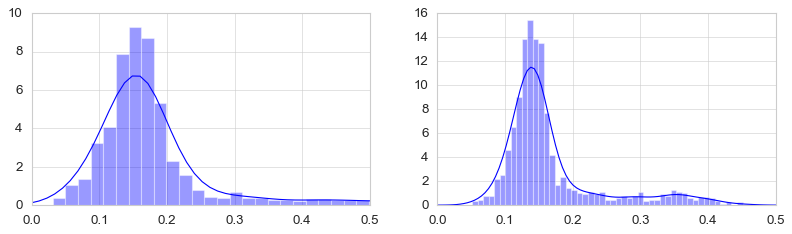

In [18]:
fig, (ax01, ax02) = plt.subplots(figsize=(12,3), ncols=2)
sns.distplot(np.mean(dm, axis=1), ax=ax01).set(xlim=(0, 0.5))
sns.distplot(np.std (dm, axis=1), ax=ax02).set(xlim=(0, 0.5))

Next, we use only the post-closedown data:

[(0.0, 0.5)]

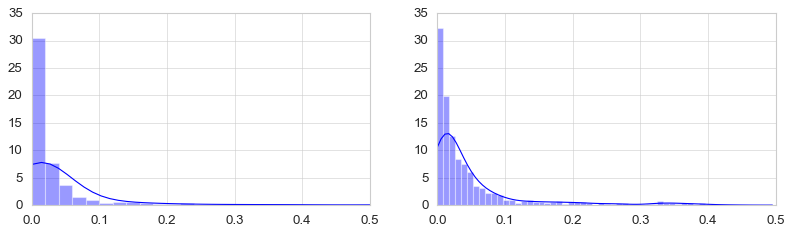

In [19]:
fig, (ax01, ax02) = plt.subplots(figsize=(12,3), ncols=2)
sns.distplot(np.mean(dm_post, axis=1), ax=ax01).set(xlim=(0, 0.5))
sns.distplot(np.std (dm_post, axis=1), ax=ax02).set(xlim=(0, 0.5))

Drop in mean mobility is evident.  Same goes for the variability in mean mobility, but hopefully enough difference between census blocks remains.

In [20]:
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])

## Classify Time Series: Binary on Mean
----

In order to differentiate census blocks, let's classify them by mobility.  One of the simplest ways is to use mean mobility.

In [21]:
dm_post_mean = np.mean(dm_post, axis=1)

Let's start with binary classification.  Because post mobility drops very close to zero in most census blocks, we have a limited range to work with.  This is how class size changes as a function of the midpoint selection:

In [22]:
def plot_hist_by_bin_size(data, midpoints):
    hist = [np.histogram(dm_post_mean, bins=[0,i,1]) for i in midpoints]
    hist_midpoints = [h[0][1] for h in hist]
    hist_max = np.max([np.sum(h[0]) for h in hist])
    
    fig, ax01 = plt.subplots(figsize=(24,4), ncols=1)
    plt.ylim(top=hist_max)
    plt.xticks(np.arange(0,1, 0.01), rotation=90)
    ax01.fill_between(midpoints, 0,              hist_midpoints, facecolor='red',   alpha=0.5)
    ax01.fill_between(midpoints, hist_midpoints, hist_max,       facecolor='green', alpha=0.5)
    ax01.plot(midpoints, hist_midpoints, lw=0.5, color='black')
    
    hist_midpoints_perc = [h / hist_max for h in hist_midpoints]
    ax02 = ax01.twinx()
    ax02.set_yticks(np.arange(0, 1.01, 0.1))

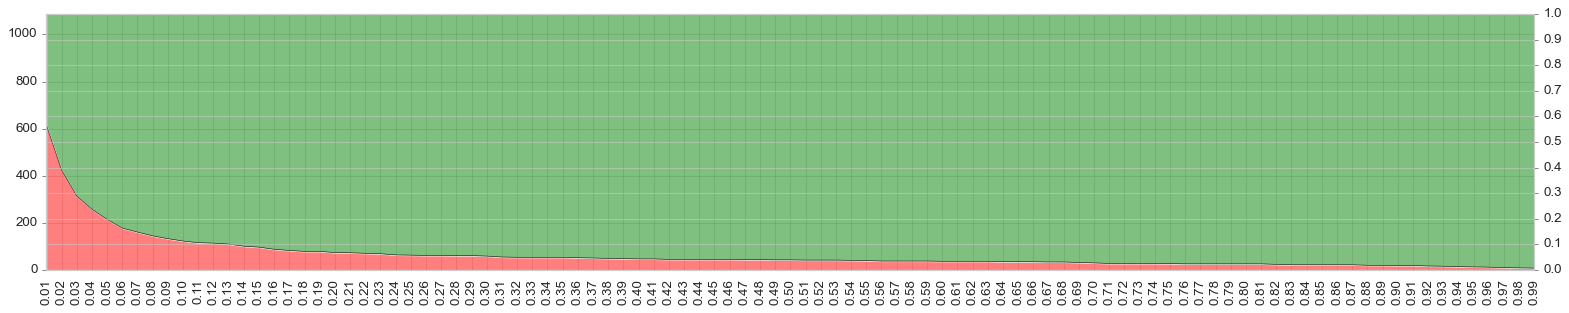

In [23]:
plot_hist_by_bin_size(dm_post_mean, np.arange(0.01, 1.0, 0.01))

Spliting census blocks on mean post mobility of abound 0.013 would result in the two group being roughly the same size.  Using larget values emphasizes the assymetry.  We will use value of **0.05** to get 0.8 of census block mass in the low-mobility group and the rest in the high-mobility group.

## Classify Time Series: Multiclass on Mean
----

Might consider this later on.

## Classify Time Series: Other Schemes
----

Might develop this later on especially that using mean mobility might smear the patterns that matter.

Previously used code here only for reference:

In [24]:
# np.histogram(dm_post_mean, bins=[0, 0.05, 1])

In [25]:
# fig, (ax01, ax02, ax03) = plt.subplots(figsize=(12,3), ncols=3)
# sns.distplot(dm_post_mean, bins=2, hist_kws={'range':(0,1)}, kde=False, ax=ax01)
# sns.distplot(dm_post_mean, bins=3, hist_kws={'range':(0,1)}, kde=False, ax=ax02)
# sns.distplot(dm_post_mean, bins=4, hist_kws={'range':(0,1)}, kde=False, ax=ax03)

In [26]:
# g = sns.FacetGrid(dm_post_mean, sharex=FalsTrue)

## Time Series Distance: Dynamic Time Warping (DTW)
----

Using the mean of the time series is simple, but likely quite wrong.  We will use a more appropriate non-aggregative time series distance measure, DTW.  Let's begin by visualizaing DTW for two random original mobiity time series.

In [27]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [313]:
def vis_dtw(ts01, ts02):
    # plt.plot(figsize=(4,4))
    d, paths = dtw.warping_paths(ts01, ts02, window=25)
    best_path = dtw.best_path(paths)
    dtwvis.plot_warpingpaths(ts01, ts02, paths, best_path)

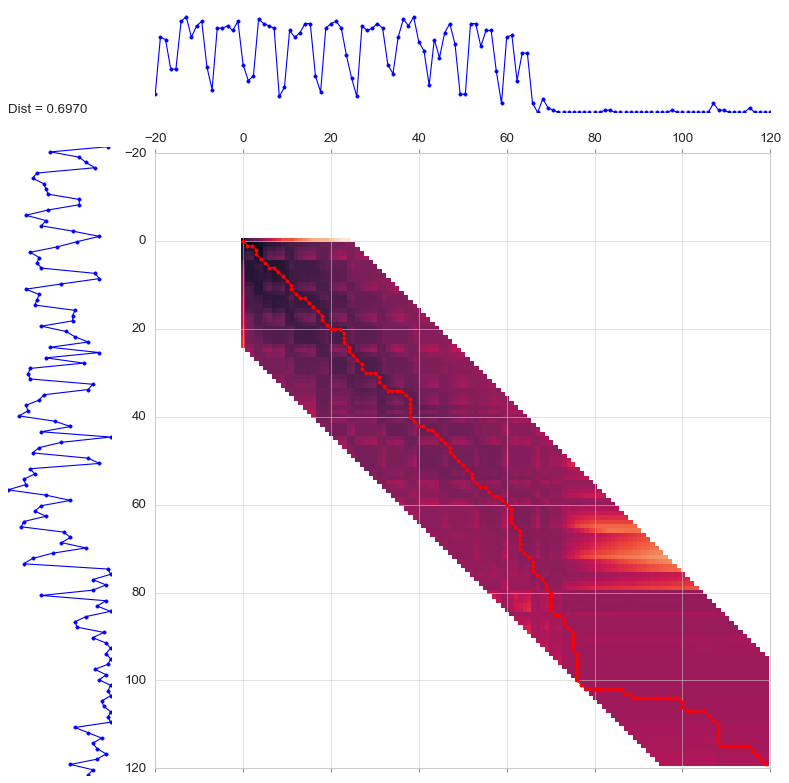

In [29]:
vis_dtw(*dm[np.random.choice(dm.shape[0], 2)])

We can see that time most series are faily dissimilar, which isn't a problem in and of itself.  Let's do the same for two random ``post`` time series.

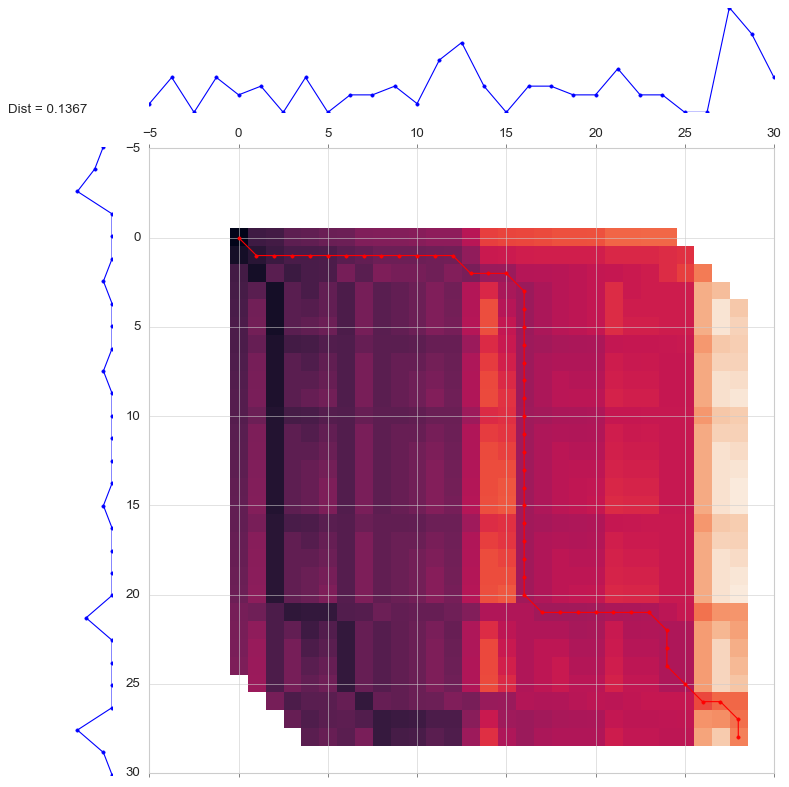

In [30]:
vis_dtw(*dm_post[np.random.choice(dm_post.shape[0], 2)])

The distance between the post time series is generally smaller.  That's likely due to (1) shorter time horizon and (2) more congruency due to stay-at-home order.  However, the distance can get quite large for some series which implies mobility pattern can differ noticeably between census blocks.  That's the sort of difference we're looking for.

Let's compute DWT distances and visualize their distribution for the original and post series.

In [57]:
dm_dtw = dtw.distance_matrix(dm, compact=True, use_c=True, use_nogil=True, show_progress=True)

In [59]:
dm_post_dtw = dtw.distance_matrix(dm_post, compact=True, use_c=True, use_nogil=True, show_progress=True)

[(0.0, 6.0)]

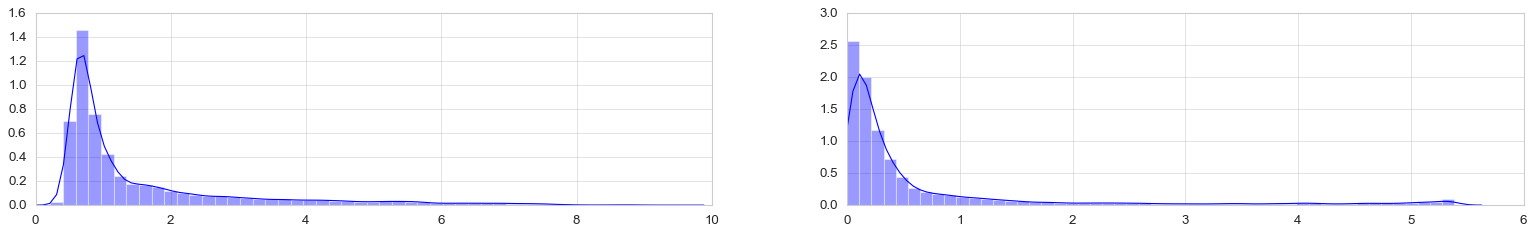

In [67]:
fig, (ax01, ax02) = plt.subplots(figsize=(24,3), ncols=2)
sns.distplot(dm_dtw,      ax=ax01).set(xlim=(0, None))
sns.distplot(dm_post_dtw, ax=ax02).set(xlim=(0, None))

The post series (the right plot above) are more similar to one another as evidenced by the distribution of DTW distances shifted towards zero.  Hoever, some seem to be more dissimlar than the original time series (the bump around DTW=5).

----

#### Tests

Below are my attempts to evaluate if the Python and c versions of the ``dtaidistance`` library yield different results.  This has been noticed by other users (e.g., [this issue](https://github.com/wannesm/dtaidistance/issues/53)).  Did't come across any problems.

In [42]:
def test_dtw_dist():
    """ Print only on dissimilar results. """
    
    idx = np.random.choice(dm.shape[0], 2)  # two random time series
    s = dm[idx]
    s_dtw_01 = dtw.distance     (s[0], s[1])
    s_dtw_02 = dtw.distance     (s[0], s[1], use_c=True)
    s_dtw_03 = dtw.distance_fast(s[0], s[1])
    
    if s_dtw_01 != s_dtw_02 or s_dtw_02 != s_dtw_03:
        print(f'{idx}: {s_dtw_01} {s_dtw_02} {s_dtw_03}')

In [43]:
for _ in range(100):
    test_dtw_dist()

In [38]:
def test_dtw_matrix(n, parallel):
    """ Print only on dissimilar results. """
    
    idx = np.random.choice(dm.shape[0], n)  # n random time series
    s = dm[idx]
    s_dtw_01 = dtw.distance_matrix     (s, compact=True, parallel=parallel)
    s_dtw_02 = dtw.distance_matrix     (s, compact=True, parallel=parallel, use_c=True)
    s_dtw_03 = dtw.distance_matrix_fast(s, compact=True, parallel=parallel)
    
    if not np.array_equal(s_dtw_01, s_dtw_02) or not np.array_equal(s_dtw_02, s_dtw_03):
        print(f'idx: {idx}')
        print(f's: {s}')
        print(f'01: {s_dtw_01}')
        print(f'02: {s_dtw_02}')
        print(f'03: {s_dtw_03}')

In [39]:
for _ in range(10):
    test_dtw_matrix(n=5, parallel=False)

In [61]:
for _ in range(10):
    test_dtw_matrix(n=5, parallel=True)

## Cluster Time Series: Agglomerative Clustering [-->](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
----

Next, we will use DTW to cluster the post time series.  We will use the [dtaidistance](https://dtaidistance.readthedocs.io) library because it has a nice visualization of the resulting dendrogram next to the time series so it will save as time.

### Algorithm

Let us investigate which algorithm to use.

In [209]:
from dtaidistance import clustering

def cluster_agglom(series, series_idx=None, n=0):
    if not series_idx is None:
        series = series[series_idx]
    else:
        if n > 0:
            series_idx = np.random.choice(series.shape[0], n)
            series = series[series_idx]
    
    model = clustering.Hierarchical(dtw.distance_matrix_fast, {})
    cluster_idx = model.fit(series)
    
    return (model, cluster_idx, series_idx)

def cluster_agglom_tree(series, series_idx=None, n=0, model=None):
    if not series_idx is None:
        series = series[series_idx]
    else:
        if n > 0:
            series_idx = np.random.choice(series.shape[0], n)
            series = series[series_idx]
    
    model = clustering.HierarchicalTree(model)
    cluster_idx = model.fit(series)
    
    return (model, cluster_idx, series_idx)

def cluster_agglom_linkage(series, series_idx=None, n=0, **kwargs):
    if not series_idx is None:
        series = series[series_idx]
    else:
        if n > 0:
            series_idx = np.random.choice(series.shape[0], n)
            series = series[series_idx]
    
    model = clustering.LinkageTree(dtw.distance_matrix_fast, {}, **kwargs)
    cluster_idx = model.fit(series)
    
    return (model, cluster_idx, series_idx)

def plot_dendrogram(model, figsize=(24, 12)):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    show_ts_label = lambda idx: "ts-" + str(idx)
    model.plot(axes=ax, show_ts_label=show_ts_label, show_tr_label=True, ts_label_margin=-10, ts_left_margin=10, ts_sample_length=1)

In [221]:
model01, cluster_idx_01, series_idx = cluster_agglom(dm_post, n=25)

 96%|█████████▌| 24/25 [00:00<00:00, 10251.89it/s]

(300, 300)


 96%|█████████▌| 24/25 [00:00<00:00, 12246.14it/s]

(300, 300)


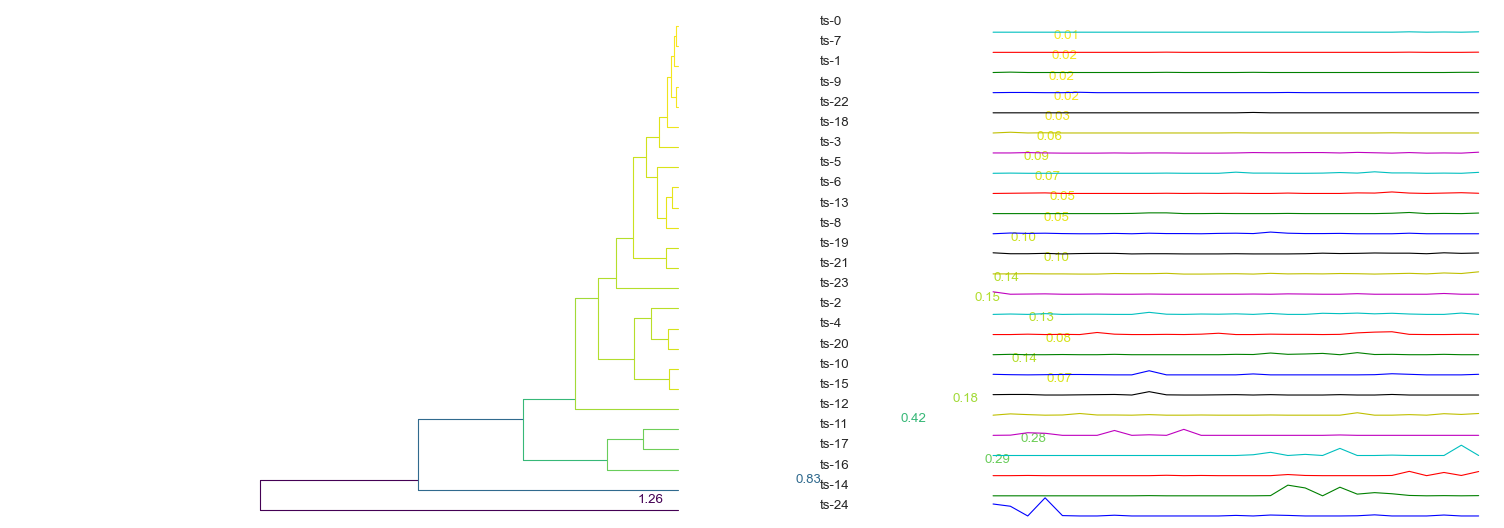

In [222]:
model02, cluster_idx_02, series_idx = cluster_agglom_tree(dm_post, series_idx, model=model01)
plot_dendrogram(model02, figsize=(24,8))

(300, 300)


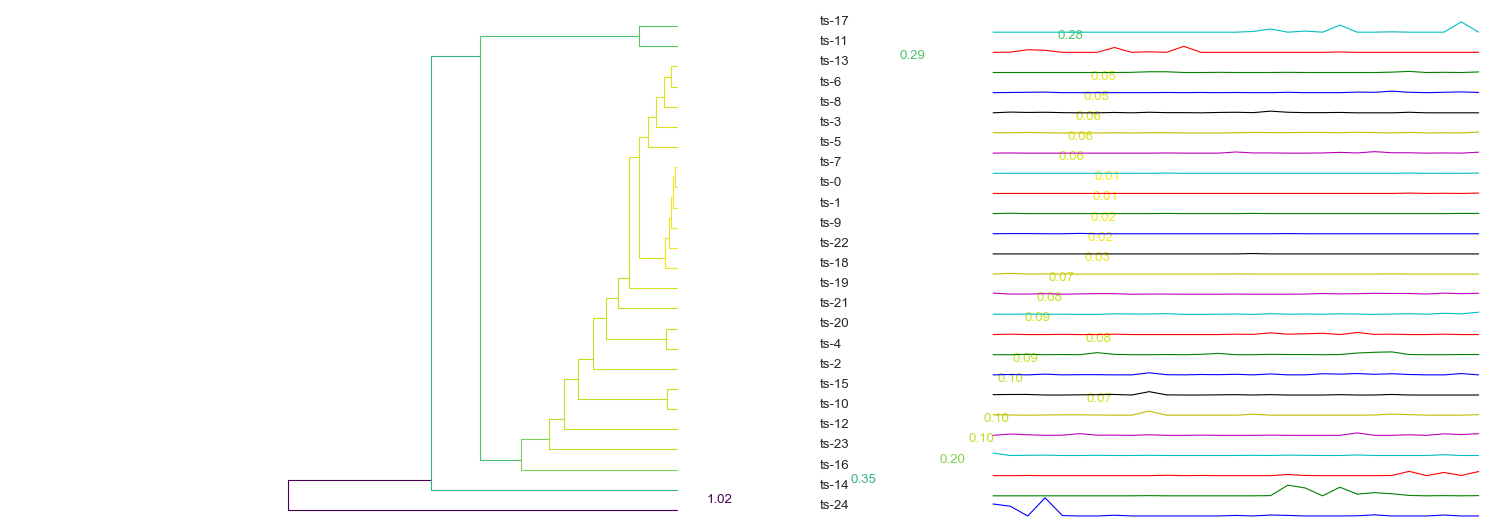

In [223]:
model03, cluster_idx_03, series_idx = cluster_agglom_linkage(dm_post, series_idx, method='single')  # single is the method default
plot_dendrogram(model03, figsize=(24,8))

(300, 300)


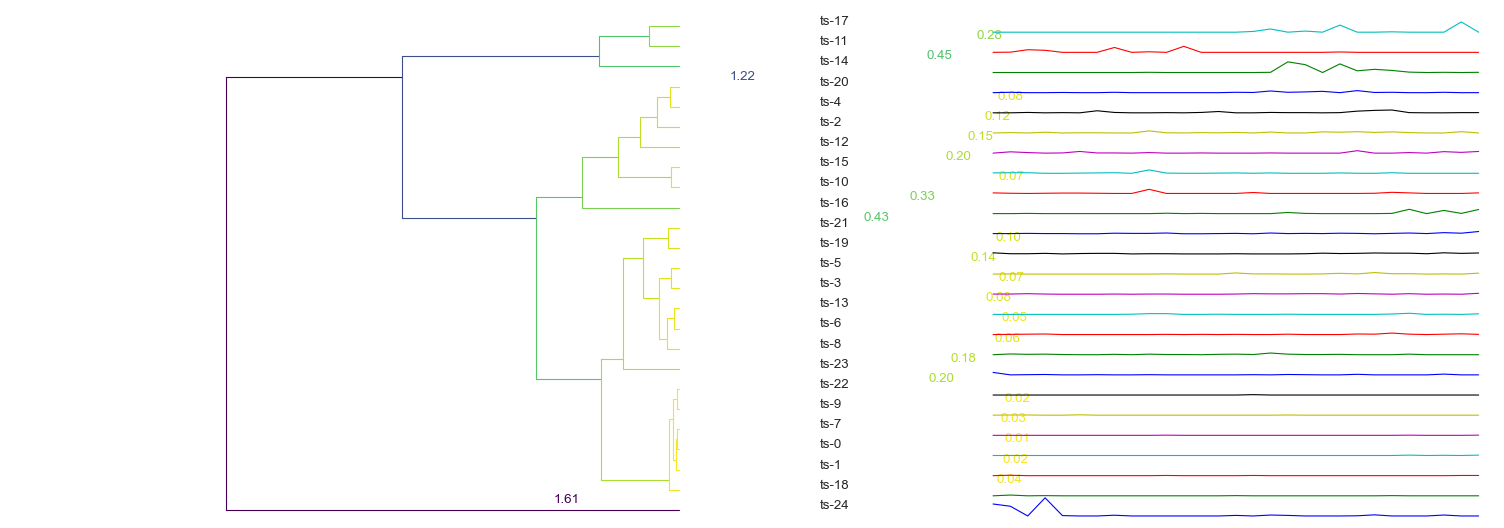

In [224]:
model03, cluster_idx_03, series_idx = cluster_agglom_linkage(dm_post, series_idx, method='ward')
plot_dendrogram(model03, figsize=(24,8))

In [216]:
# model01.__dict__

In [215]:
# model02.__dict__

In [214]:
# model03.__dict__

Having tried a random set of time series with both the ``cluster_agglom_tree()`` and ``cluster_agglom_linkage()`` it seems the former does a better job of keeping time series exhibiting higher level of mobilty together (i.e., in the same cluster).  This might be due to parameters, but for the defaults that's the case.  The latter method is essentialy a wrapper for the [SciPy's hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) with the DTW matrix as the pairwise distance matrix.

### Number of Clusters

Now, let's use the all the series and plot the top of the dendrogram to get an idea about how the clusters were merged.

In [230]:
from scipy.cluster.hierarchy import dendrogram

For the record, this uses `scipy` to draws the full dendrogram of the random sample of time series we have used above:

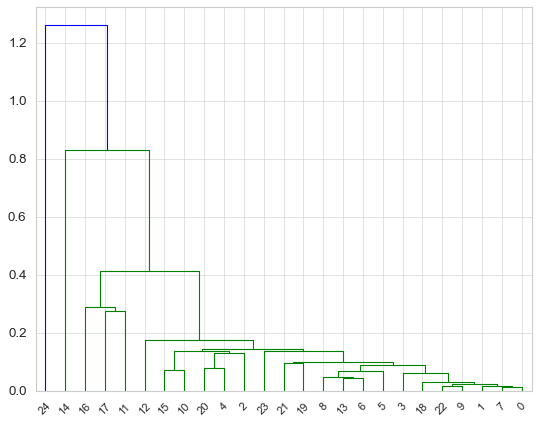

In [233]:
dn = dendrogram(model02.linkage)

#### Data

First, let us refit the models from before but using all the series:

In [234]:
model01, cluster_idx_01, series_idx = cluster_agglom(dm_post)
model02, cluster_idx_02, series_idx = cluster_agglom_tree(dm_post, model=model01)
model03, cluster_idx_03, series_idx = cluster_agglom_linkage(dm_post, method='single')  # single is the method default

(590241, 590241)


100%|█████████▉| 1086/1087 [00:04<00:00, 262.84it/s]


(590241, 590241)


100%|█████████▉| 1086/1087 [00:04<00:00, 262.44it/s]


(590241, 590241)


#### Visualization

Now it's time to check what's going on inside.  We will use this slightly modified version of a function created by [Jörn Hees](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial):

In [261]:
def fancy_dendrogram(Z, figsize=(24,8), *args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    plt.figure(figsize=figsize)
    dn = dendrogram(Z, *args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(dn['icoord'], dn['dcoord'], dn['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
        plt.show()
    
    return dn

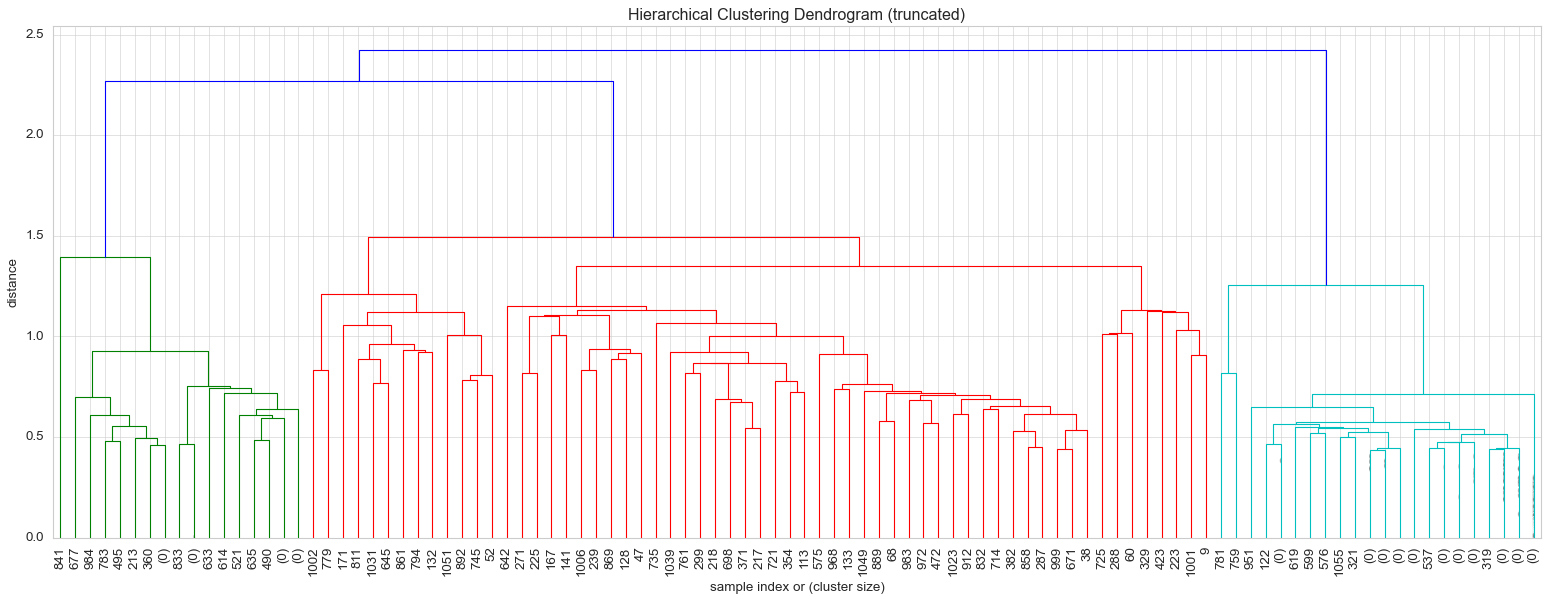

In [305]:
dn = fancy_dendrogram(model02.linkage, truncate_mode='lastp', p=100, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)

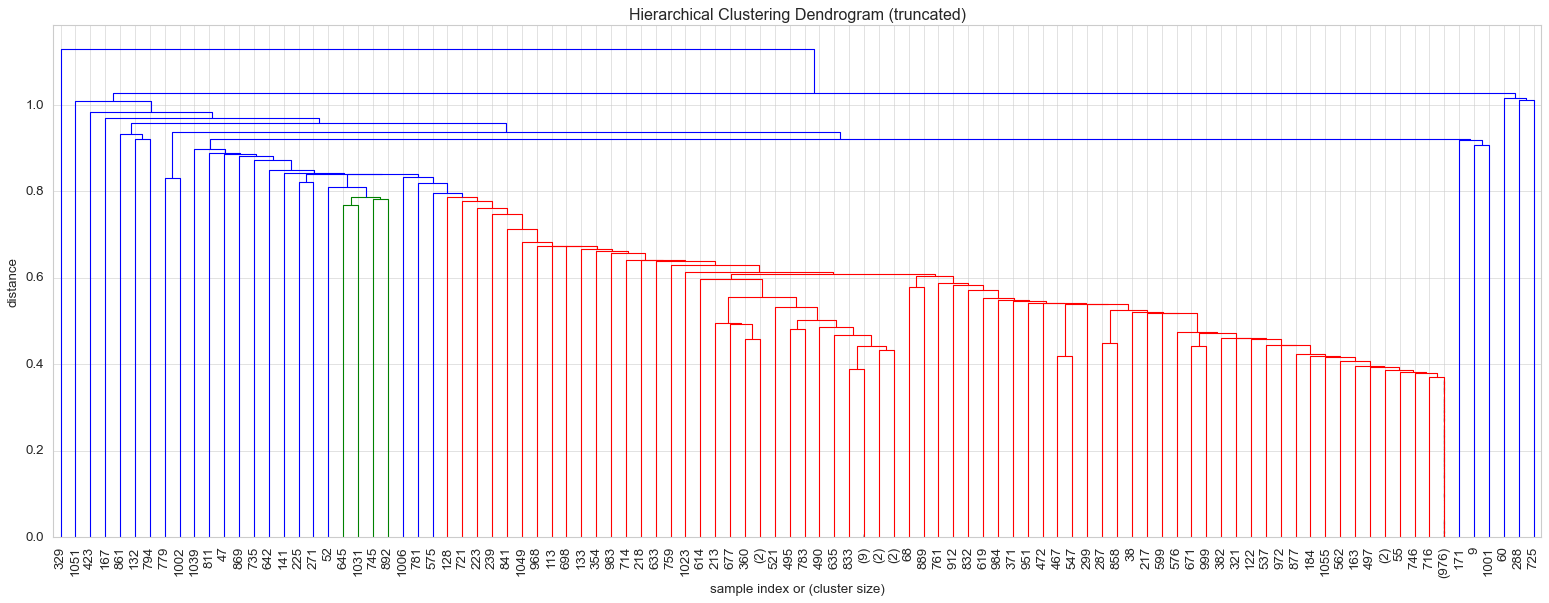

In [306]:
dn = fancy_dendrogram(model03.linkage, truncate_mode='lastp', p=100, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)

#### Clusters - By Maximum Distance

First, let us cluster the series according to the maximum distance between them.  We will use value of 1.2 for `model02` (which should yield eight clusters) and 0.7 for `model03` (which will yield more clusters).

In [311]:
from scipy.cluster.hierarchy import fcluster

In [312]:
print(len(set(fcluster(model02.linkage, 1.2, criterion='distance'))))
print(len(set(fcluster(model03.linkage, 0.7, criterion='distance'))))

8
38


#### Clusters - By Number

Next, we will simpy specify the number of clusters we are after is three.

In [280]:
clusters = fcluster(model02.linkage, 3, criterion='maxclust')
len(set(clusters))

3

Next, let's plot histograms of series for different numbers of clusters for `model02` and `model03`.

In [296]:
def plot_clusters_by_num(Z, ncluster=[2,3]):
    fig, ax = plt.subplots(figsize=(len(ncluster) * 3, 2), ncols=len(ncluster))
    for (i,nc) in enumerate(ncluster):
        sns.distplot(fcluster(model02.linkage, nc, criterion='maxclust'), kde=False, ax=ax[i])

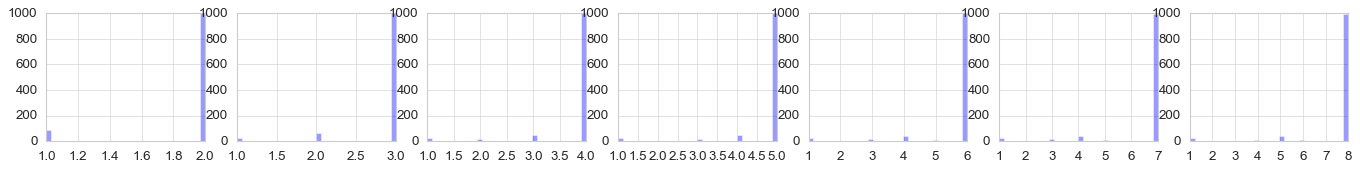

In [303]:
plot_clusters_by_num(model02.linkage, ncluster=[2,3,4,5,6,7,8])

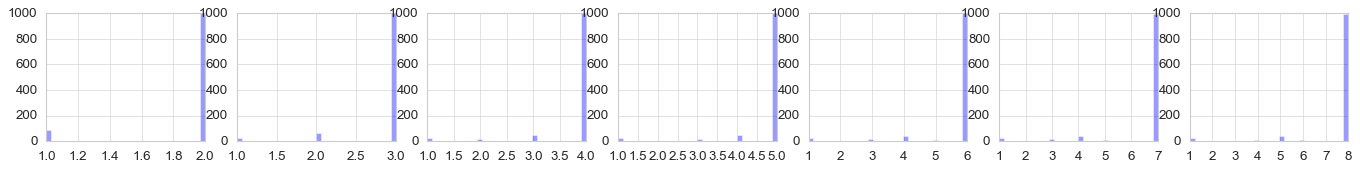

In [304]:
plot_clusters_by_num(model03.linkage, ncluster=[2,3,4,5,6,7,8])

It apppears that lookin at small number of clusters, no matter what, one cluster captures over 90% of the mobility post time series mass.  That's probably due to many census blocks having almost no mobility (at least as measured by phone location).

----

Old code:

In [197]:
# from sklearn.cluster import AgglomerativeClustering
# dm_clusters = AgglomerativeClustering(n_clusters=2).fit(dm)
# # dm_clusters.n_clusters_
# dm_clusters.labels_[:100]

In [ ]:
# fig = plt.figure(figsize=(4,2))
# sns.distplot(dm_clusters.labels_, kde=False)

## References
----

- [seaborn API](https://seaborn.pydata.org/api.html)
- [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)
- [DTAI Distance: Time Series Distances](https://github.com/wannesm/dtaidistance)
- [SciPy Hierarchical Clustering and Dendrogram Tutorial](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

## Miscellaneous
----

### Social Distancing Compliance

This is based on Kostas' beta regression analysis.

Age < 50:

In [190]:
!echo '(91.0 - 73.5) / (100 - 73.5)' | bc -l

.66037735849056603773


Age > 50:

In [191]:
!echo '(86.3 - 75.0) / (100 - 75.0)' | bc -l

.45200000000000000000
